In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [36]:
datos = pd.read_csv("work/insurance.csv")

In [12]:
datos

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [13]:
datos.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [14]:
datos.tail(5)

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [15]:
datos.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [16]:
datos.describe().T


,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


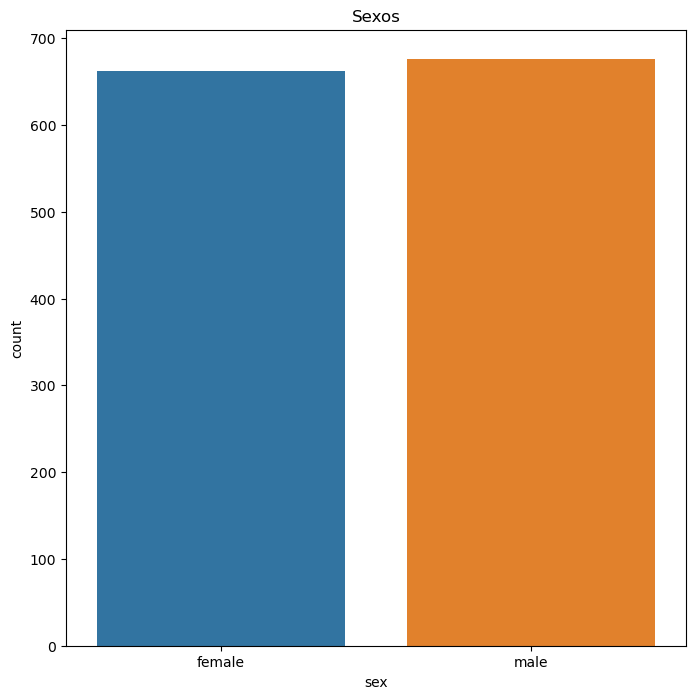

male      676
female    662
Name: sex, dtype: int64

In [20]:
plt.figure(figsize=(8,8))
plt.title("Sexos")
sns.countplot(data=datos, x='sex')
plt.show()
datos.sex.value_counts()

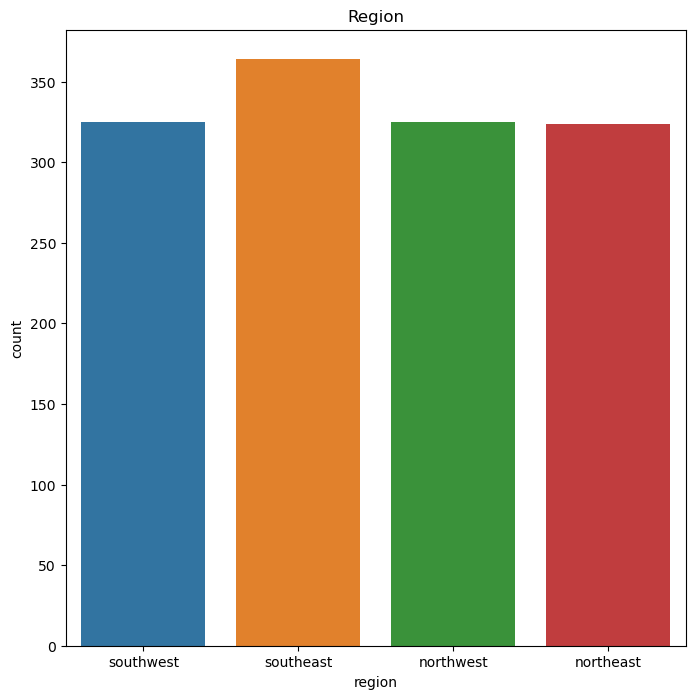

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [21]:
plt.figure(figsize=(8,8))
plt.title("Region")
sns.countplot(data=datos, x='region')
plt.show()
datos.region.value_counts()

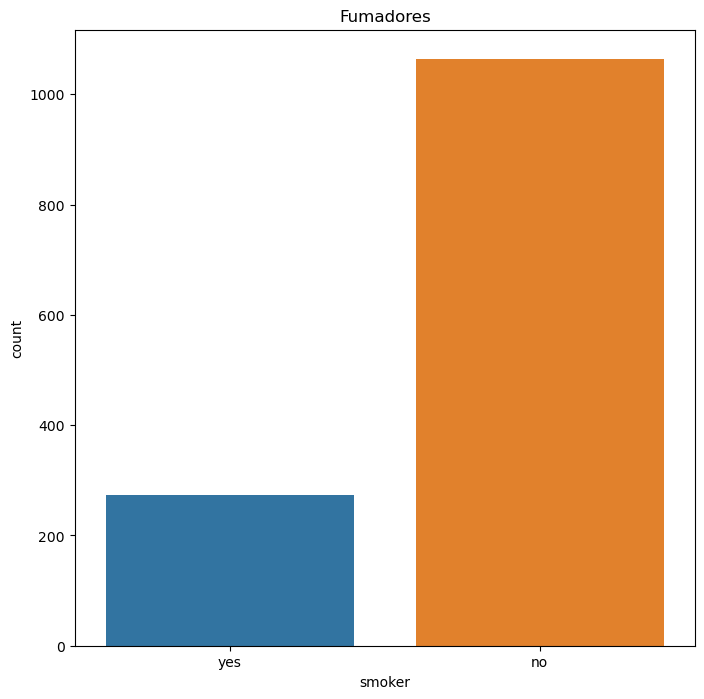

no     1064
yes     274
Name: smoker, dtype: int64

In [22]:
plt.figure(figsize=(8,8))
plt.title("Fumadores")
sns.countplot(data=datos, x='smoker')
plt.show()
datos.smoker.value_counts()

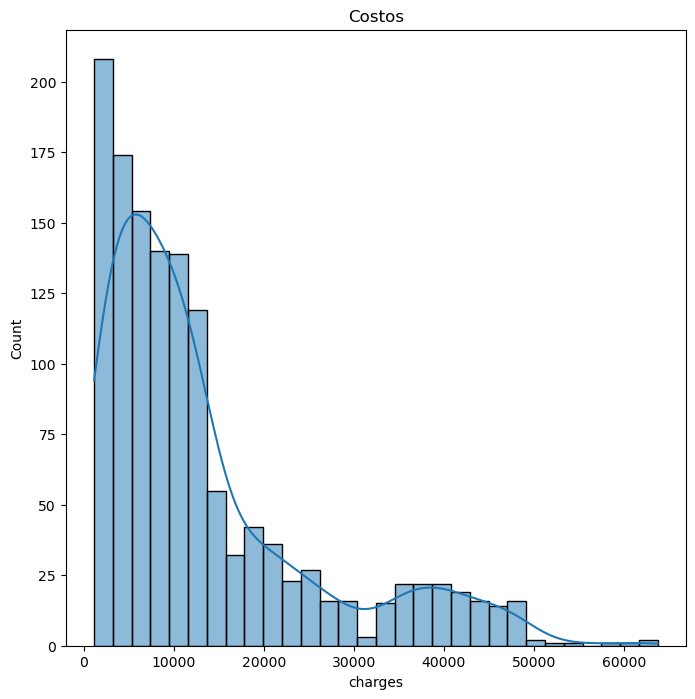

In [24]:
plt.figure(figsize=(8,8))
plt.title("Costos")
sns.histplot(data=datos, x='charges', kde=True)
plt.show()

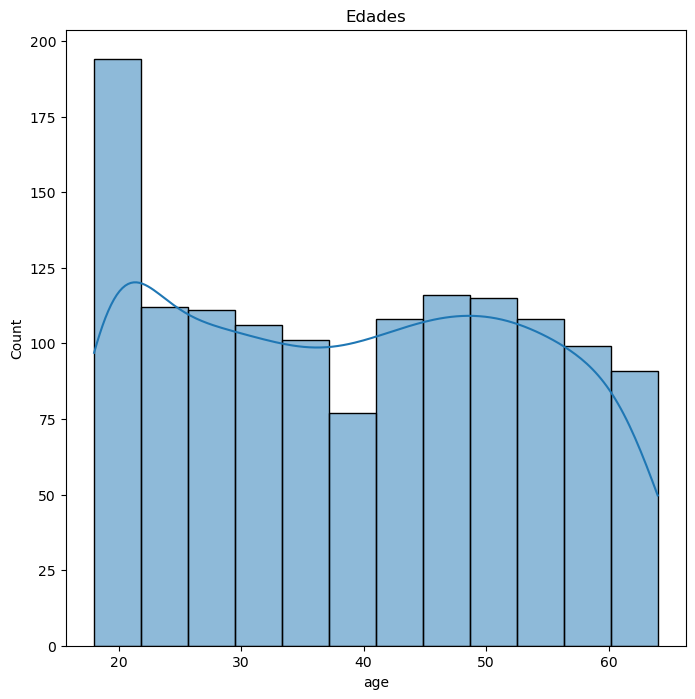

In [25]:
plt.figure(figsize=(8,8))
plt.title("Edades")
sns.histplot(data=datos, x='age', kde=True)
plt.show()

Aquí tenemos lo que llamamos una distribución equiprobable. 

INFORME: Tengo la misma proporción de gente en todas las edades comprendidas entre 20 y 65 años. Parace que hay más gente de 20 (como el doble que de otros grupos)

MOSQUEA ! Si que encontramos un pico en los jóvenes. Hay el doble de gente de 20 años que de otras edades:

- Babyboom (raro)
- Puede haber algún factor externo que motive esto: Al entrar en la universidad les obligan a tener un seguro. Para hacer el viaje de estudios, les obligan. Tenemos una campaña de publicidad cojonuda que atrae mucho a los jóvenes.
- Tenga un sesgo de cojones. Tengo una muestra no representativa de la población ¿?¿? Las concluiones del estudio podrían estar comprometidas

La media de edad es 40 años. La gente pensaría antes esto que la mayor parte de la gente está entorno a este valor. ENGAÑOSO

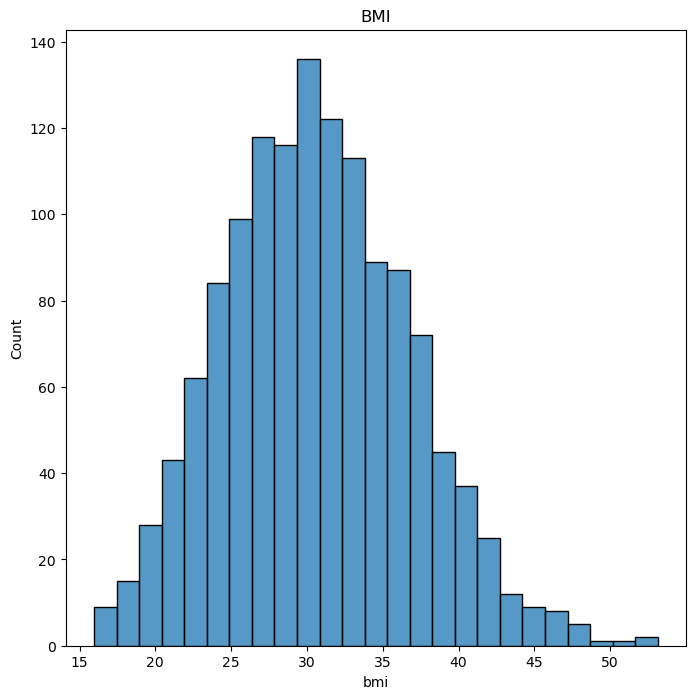

In [40]:
plt.figure(figsize=(8,8))
plt.title("BMI")
sns.histplot(data=datos, x='bmi')
plt.show()

In [ ]:
El índice de masa corporal se distribuye según una normal, centrada en 30,66, con una desv tipica de 6.

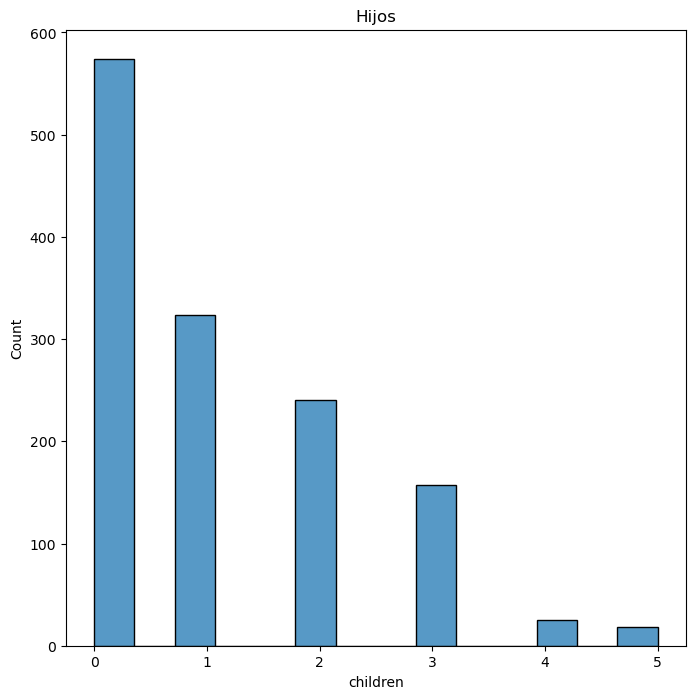

In [38]:
plt.figure(figsize=(8,8))
plt.title("Hijos")
sns.histplot(data=datos, x='children')
plt.show()

Distribución de Poisson: Distribución de sucesos raros.
La mayor parte de la gente no tiene hijos. Y el tener más hijos es cada vez más raro.

In [39]:
datos.children.value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

# Momento de reflexión

Nos interesa saber la relación que guardan esas variables con los gastos.

## A priori, que pensais?

Sexo: 
- Si que va a afectar - Ginecología - Embarazo                  Las mujeres un poco más costosas
- Afectará mucho o poco? No mucho
    
Región: 
- Según la zona, los tratamientos médicos sean más costosos. Un poco... tampoco parece que mucho
- Haya regiones que tengan una mejor calidad de vida (contaminación, hábitos...) Creo que tampoco mucho.

Fumar:
- Parece que los fumadores pueden tener más enfermedades por fumar, y por ende, salir más caros ****

Edad:
- Si que afecta... Cuanto más mayor más costes

Hijos:
- A más hijos.... más coste

BMI: 
- A partir de cierto punto (obesidad importante) puede haber una diferencia.


# Relaciones nominal x nominal

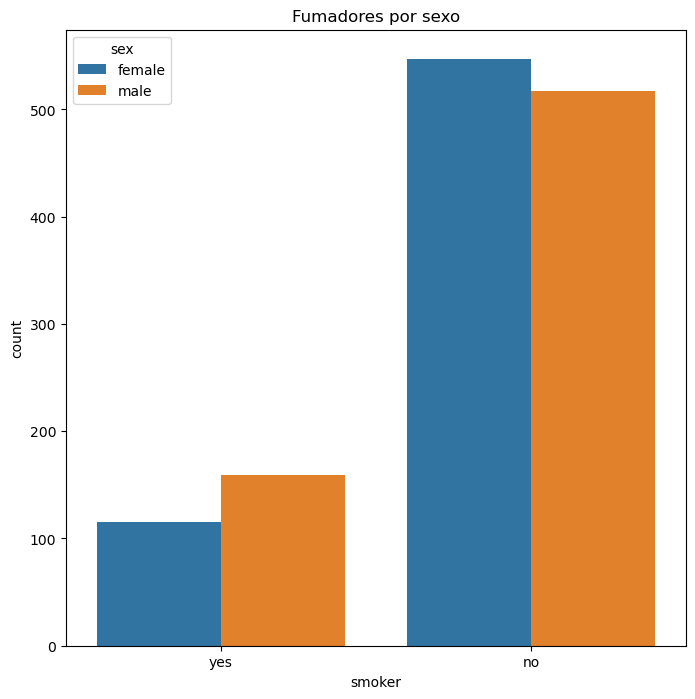

smoker  sex   
no      female    547
        male      517
yes     female    115
        male      159
Name: sex, dtype: int64

In [45]:
plt.figure(figsize=(8,8))
plt.title("Fumadores por sexo")
sns.countplot(data=datos, x='smoker', hue='sex')
plt.show()

datos.groupby(['smoker','sex'])['sex'].count()

Los hombres fuman más que las mujeres... Un poquito

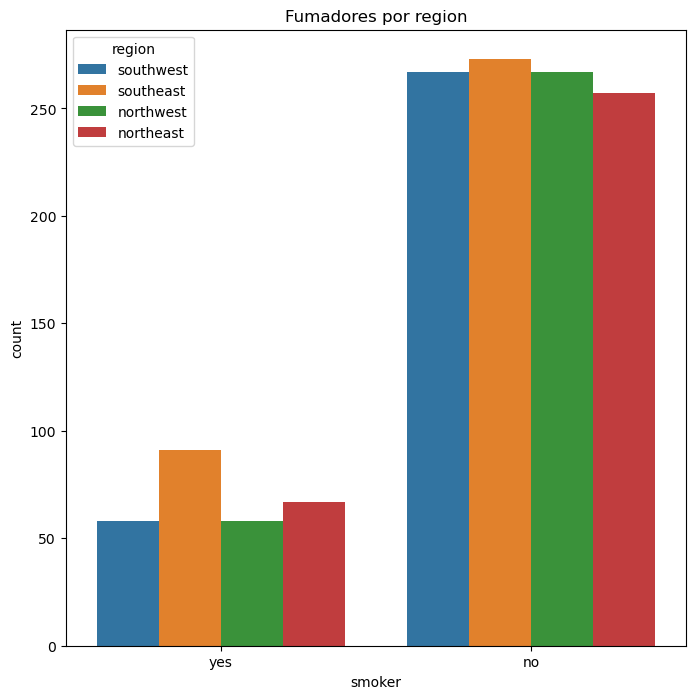

smoker,no,yes
region,,
northeast,257,67
northwest,267,58
southeast,273,91
southwest,267,58


In [48]:
plt.figure(figsize=(8,8))
plt.title("Fumadores por region")
sns.countplot(data=datos, x='smoker', hue='region')
plt.show()

pd.crosstab(index = datos.region, columns=datos.smoker, values = datos.region, aggfunc='count')

En la región sureste hay un mayor porcentaje de fumadores

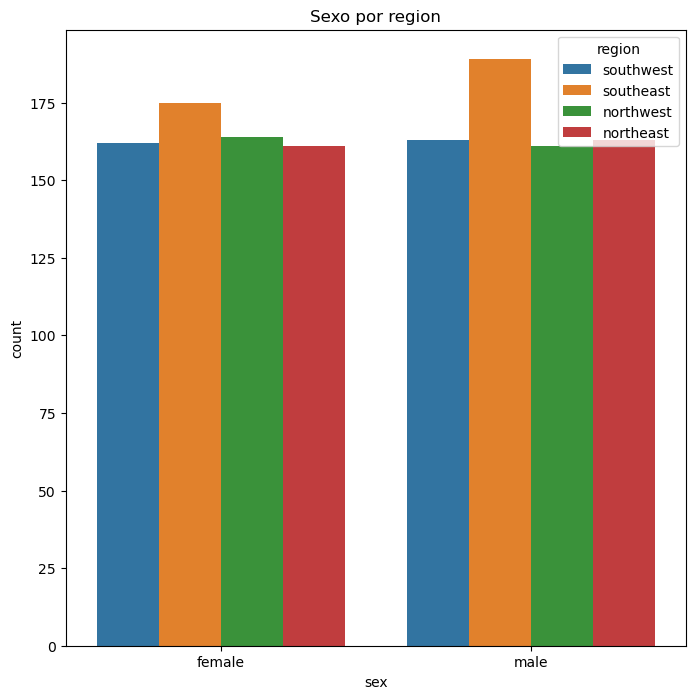

sex,female,male
region,,
northeast,161,163
northwest,164,161
southeast,175,189
southwest,162,163


In [49]:
plt.figure(figsize=(8,8))
plt.title("Sexo por region")
sns.countplot(data=datos, x='sex', hue='region')
plt.show()

pd.crosstab(index = datos.region, columns=datos.sex, values = datos.region, aggfunc='count')

Los generos se reparten tal y como en la población en las distintas regiones. 

Tan solo apreciamos un poquito más de hombres de lo esperado en la región sureste.

Esto cuadra con que en esa región sureste había más fumadores... y ya habíamos dicho que los hombres fuman más.

# Relaciones entre cuantitativas y nominales


In [ ]:
Cuantitativas: Age, CHARGES, Children, BMI
Nominales: Region, Sex, Fumar




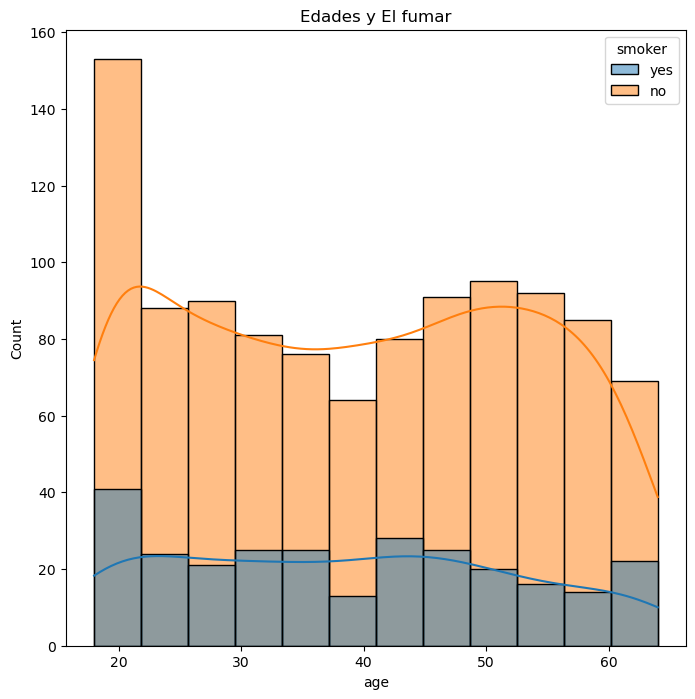

In [51]:
plt.figure(figsize=(8,8))
plt.title("Edades y El fumar")
sns.histplot(data=datos, x='age', kde=True, hue = 'smoker')
plt.show()

In [ ]:
Parece que a partir de los 40 y pico, la gente empieza a dejar de fumar un poquito.

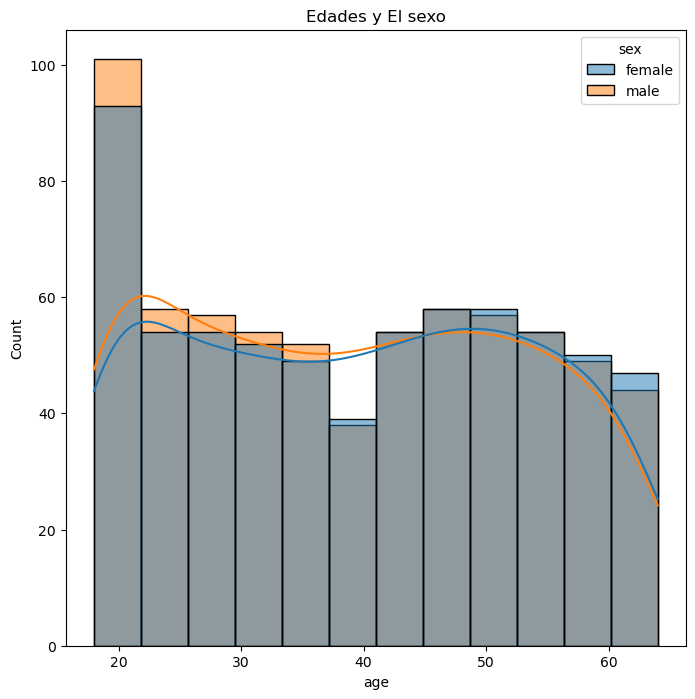

In [ ]:
plt.figure(figsize=(8,8))
plt.title("Edades y El sexo")
sns.histplot(data=datos, x='age', kde=True, hue = 'sex')
plt.show()

Tenemos la misma cantidad de hombres que de mujeres en todos los tramos de edad.: 
Las variables son TOTALMENTE INDEPENDIENTES !!!

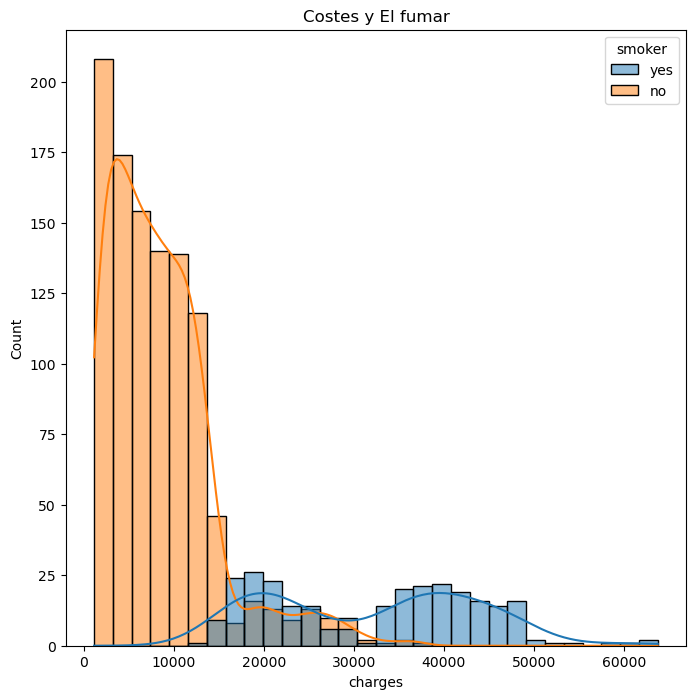

In [54]:
plt.figure(figsize=(8,8))
plt.title("Costes y El fumar")
sns.histplot(data=datos, x='charges', kde=True, hue = 'smoker')
plt.show()

Los no fumadores cuestan mucho menos que los fumadores... aunque tenemos una cola a la derecha (manolos)

Los fumadores a su vez, se dividen en 2 grupos. Unos cuestan menos que los otros... por qué?

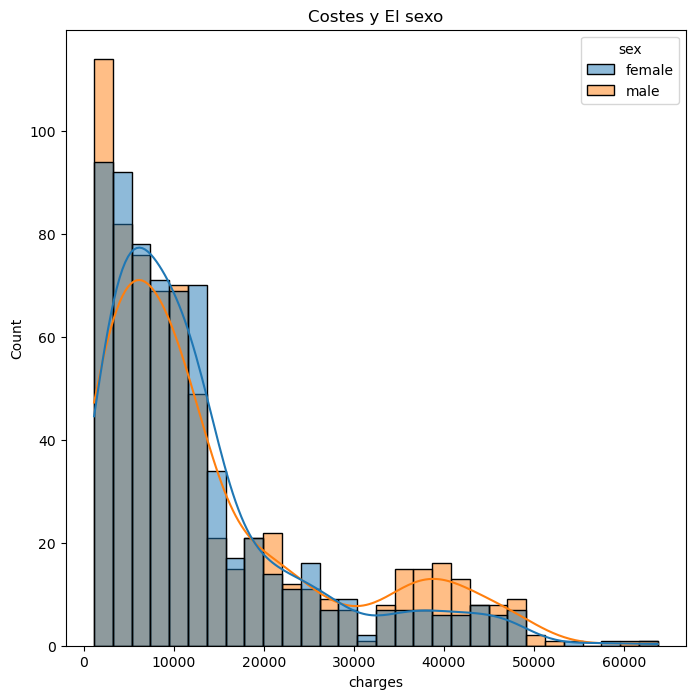

In [56]:
plt.figure(figsize=(8,8))
plt.title("Costes y El sexo")
sns.histplot(data=datos, x='charges', kde=True, hue = 'sex')
plt.show()

A partir de los 32km, hay una proporción mayor de hombres en costes altos.

Notas:

1- Esto no encaja con nuestra suposición a priori

2- Si encaja con que los hombres fuman más, y ya hemos visto que los fumadores cuestan más.

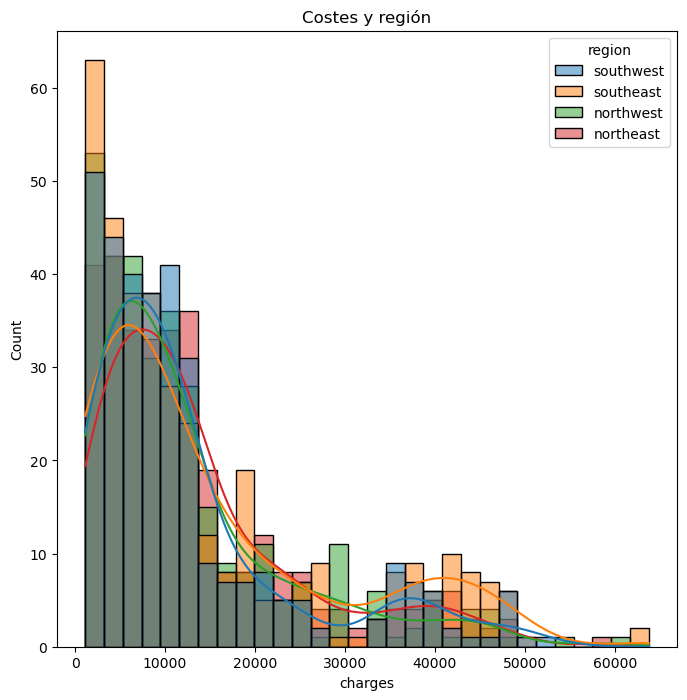

In [58]:
plt.figure(figsize=(8,8))
plt.title("Costes y región")
sns.histplot(data=datos, x='charges', kde=True, hue = 'region')
plt.show()

In [ ]:
Parece que los caros están un poco más concentrados en la región sureste,
que encaja con que ahí hay más hombres y los hombres fuman más.

<Figure size 600x600 with 0 Axes>

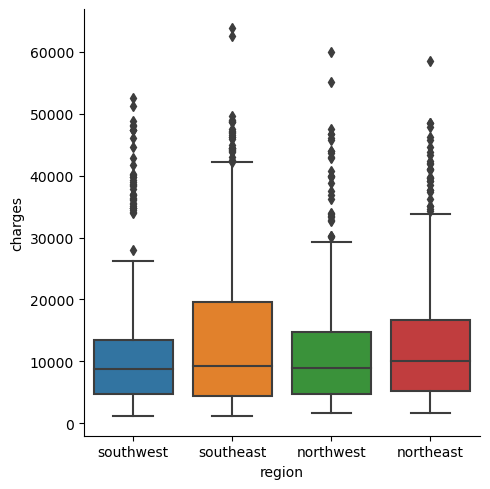

In [62]:
plt.figure(figsize=(6,6))
sns.catplot(y = 'charges', x='region', kind='box', data=datos)
plt.show()

En sureste hay más gente que cuesta más, ya que hay más hombres fumadores.

Los precios más caros, donde están? Noreste

/tmp/ipykernel_107/1667638785.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlaciones = datos.corr()


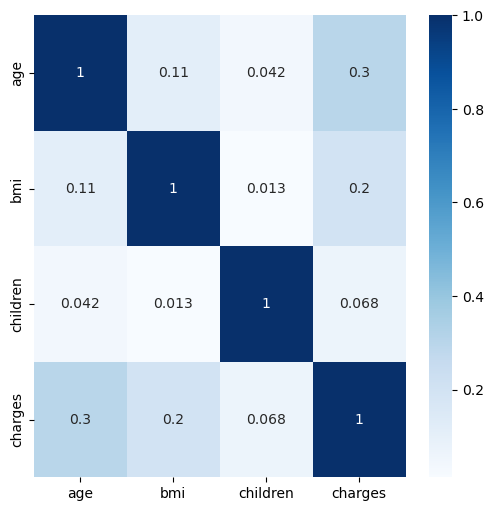

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [71]:
# Cuantitativa x Cuantitativa

# Coef. correlacion de Pearson
correlaciones = datos.corr()

plt.figure(figsize=(6,6))
sns.heatmap(correlaciones,cmap='Blues',annot=True)
plt.show()
# Diagrams de dispersión

## Charges x Age
## Charges x Hijos
## Charges x BMI
correlaciones

# 0.109272

Hay una muy baja tendencia, a estar más gordito según se tienen más años.

# Con respecto a los gastos:

A más edad, más cuesto... Una tendencia de intensidad baja. 
A más gordito, más paste...  Una tendencia de intensidad bastante baja.

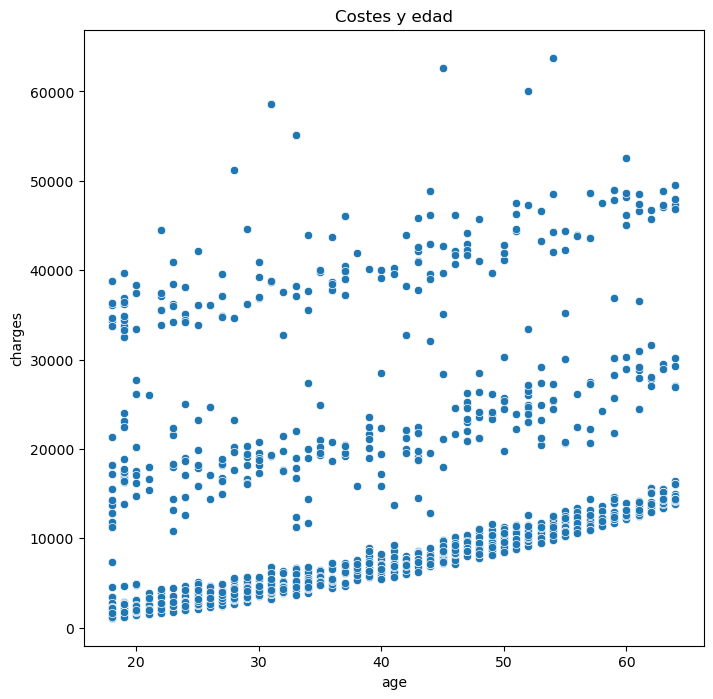

In [72]:
plt.figure(figsize=(8,8))
plt.title("Costes y edad")
sns.scatterplot(data=datos, x='age', y = 'charges')
plt.show()

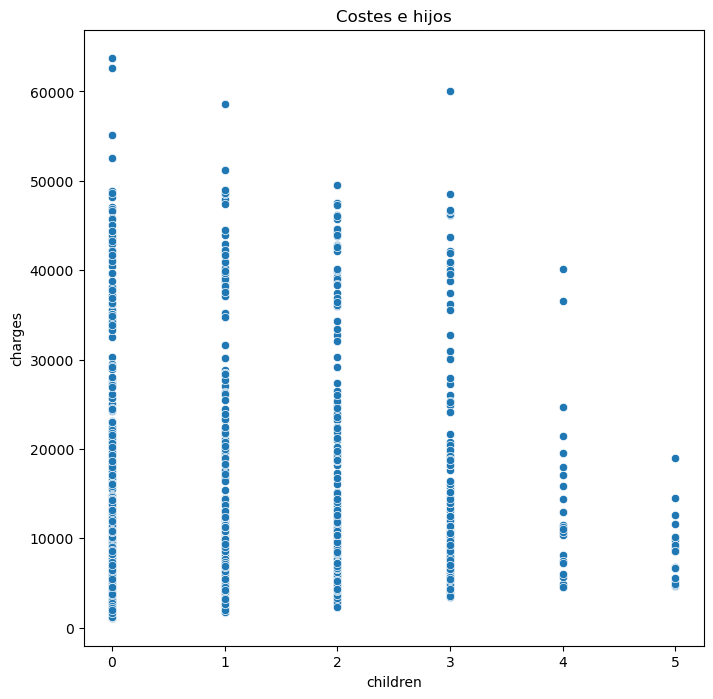

In [73]:
plt.figure(figsize=(8,8))
plt.title("Costes e hijos")
sns.scatterplot(data=datos, x='children', y = 'charges')
plt.show()

<Figure size 600x600 with 0 Axes>

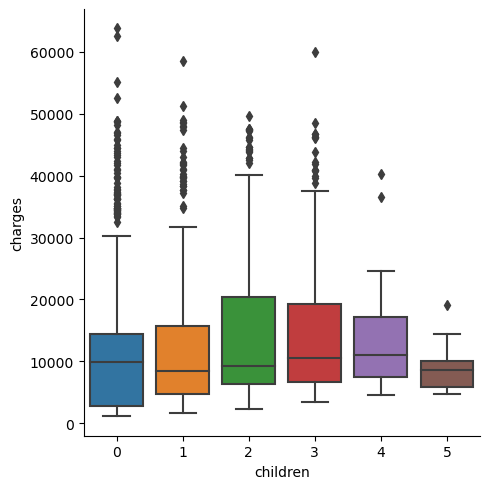

In [74]:
plt.figure(figsize=(6,6))
sns.catplot(y = 'charges', x='children', kind='box', data=datos)
plt.show()

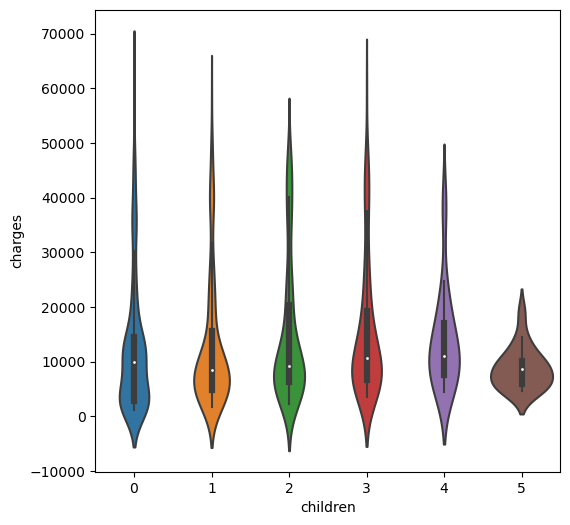

In [75]:
plt.figure(figsize=(6,6))
sns.violinplot(y = 'charges', x='children', data=datos)
plt.show()

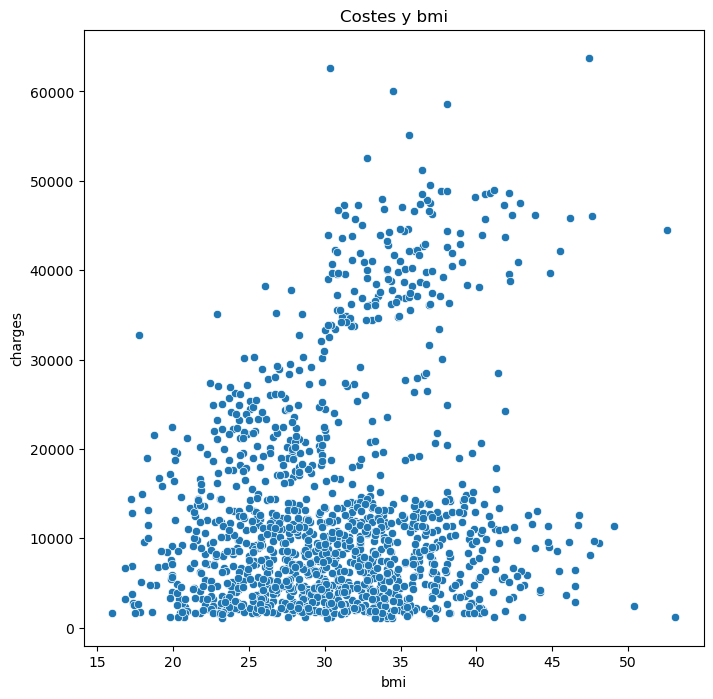

In [76]:
plt.figure(figsize=(8,8))
plt.title("Costes y bmi")
sns.scatterplot(data=datos, x='bmi', y = 'charges')
plt.show()

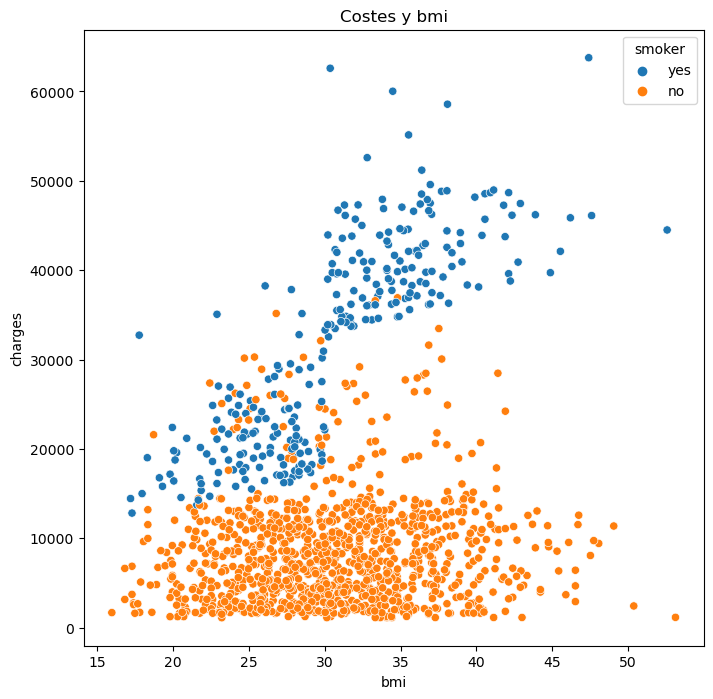

In [77]:
# Relaciones entre 3 variables

plt.figure(figsize=(8,8))
plt.title("Costes y bmi")
sns.scatterplot(data=datos, x='bmi', y = 'charges', hue='smoker')
plt.show()

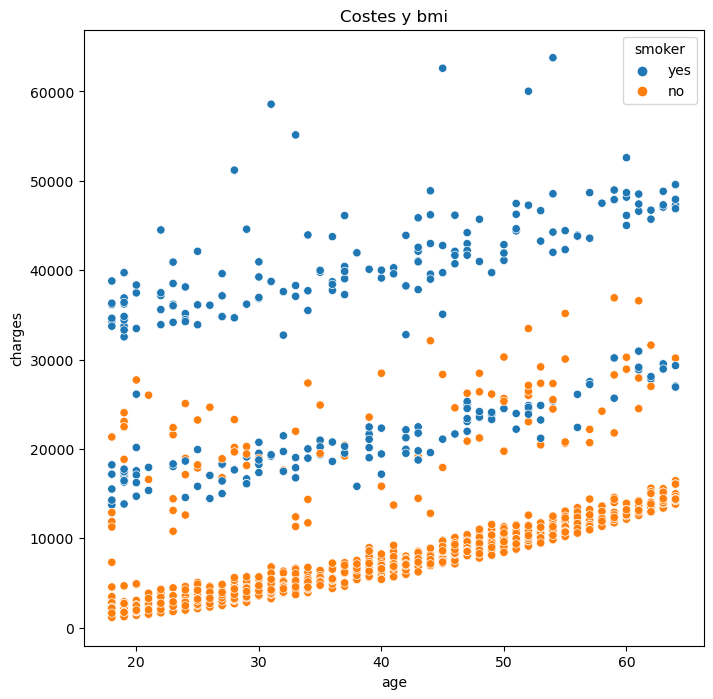

In [78]:

plt.figure(figsize=(8,8))
plt.title("Costes y edad")
sns.scatterplot(data=datos, x='age', y = 'charges', hue='smoker')
plt.show()

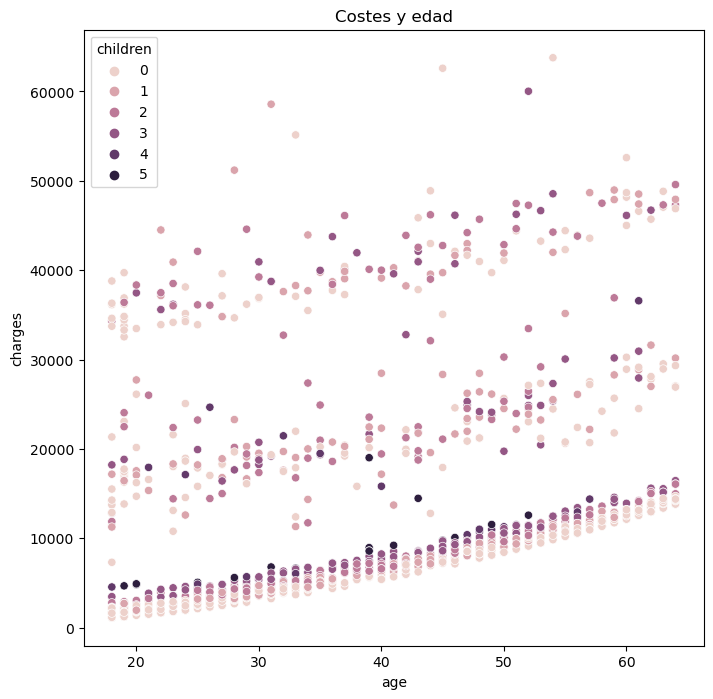

In [79]:

plt.figure(figsize=(8,8))
plt.title("Costes y edad")
sns.scatterplot(data=datos, x='age', y = 'charges', hue='children')
plt.show()

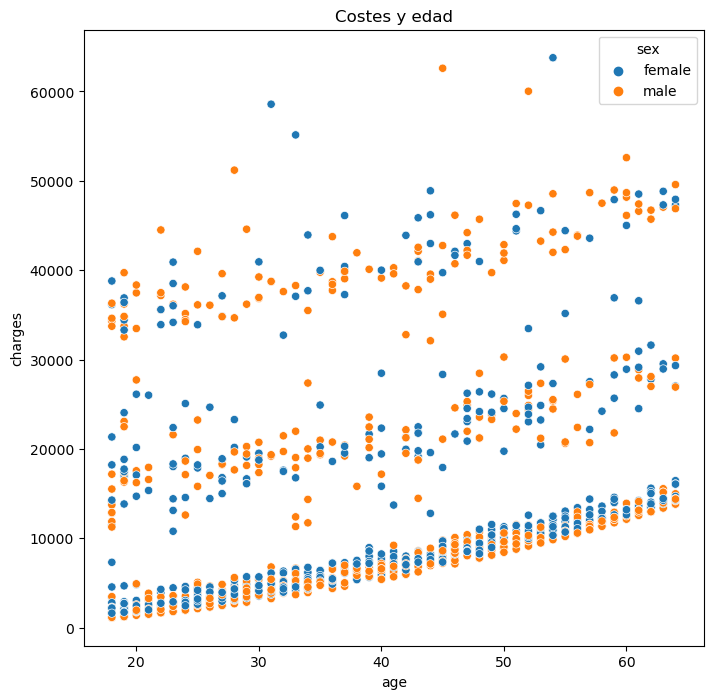

In [80]:
plt.figure(figsize=(8,8))
plt.title("Costes y edad")
sns.scatterplot(data=datos, x='age', y = 'charges', hue='sex')
plt.show()

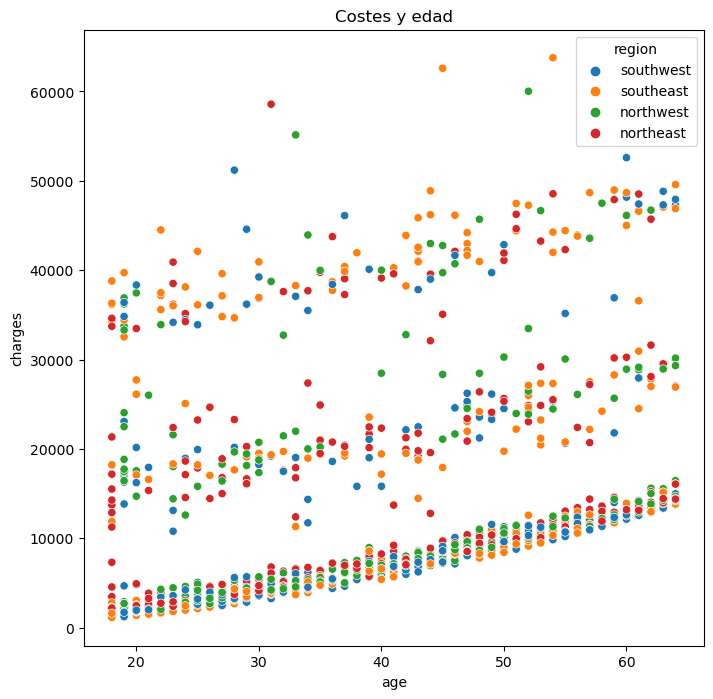

In [81]:
plt.figure(figsize=(8,8))
plt.title("Costes y edad")
sns.scatterplot(data=datos, x='age', y = 'charges', hue='region')
plt.show()